## 앙상블 학습 : 배깅 방식 예제

### 배깅(Bagging)
- 보팅과 동일하게 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이지만    
- 보팅과 다르게 각각의 분류기가 모두 같은 유형의 알고리즘 기반     
- 샘플링을 서로 다르게 하면서 학습 수행  
- 대표적인 배깅 방식 : 랜덤 포레스트 알고리즘  

### 랜덤 포레스트 (Random Forest)   
- 앙상블 알고리즘 중 수행 속도가 빠르고  
- 다양한 영역에서 높은 예측 성능을 보임  
- 기반 알고리즘은 결정 트리  
- 결정 트리의 쉽고 직관적인 장점을 그대로 채택  
- (대부분의 부스팅 기반의 다양한 알고리즘 역시  
  결정 트리 알고리즘을 기반 알고리즘으로 채택)  
  - 이유 
      - 결정트리 알고리즘이 많이 약한 알고리즘이기 때문에
      - 여러 개의 분류기(모형)으로 학습시켜 (앙상블 학습) 예측할 경우 
      - 성능 효과를 가장 크게 볼 수 있으므로
      - 대부분의 부스팅 기반에서 결정 트리 알고리즘을 기반 알고리즘으로 채택  

랜덤 포레스트의 예측 결정 방식  
- 여러 개의 결정 트리 분류기가  
- 전체 데이터에서 배깅 방식으로 각지의 데이터를 샘플링하여  
- 개별적으로 학습을 수행한 뒤  
- 최종적으로 모든 분류기가 보팅을 통해 예측 결정  
- 소프트 보팅 방식 사용 (분류기들의 레이블 값 결정 확률을 평균내서 확률이 가장 높은 레이블 값 선정)  

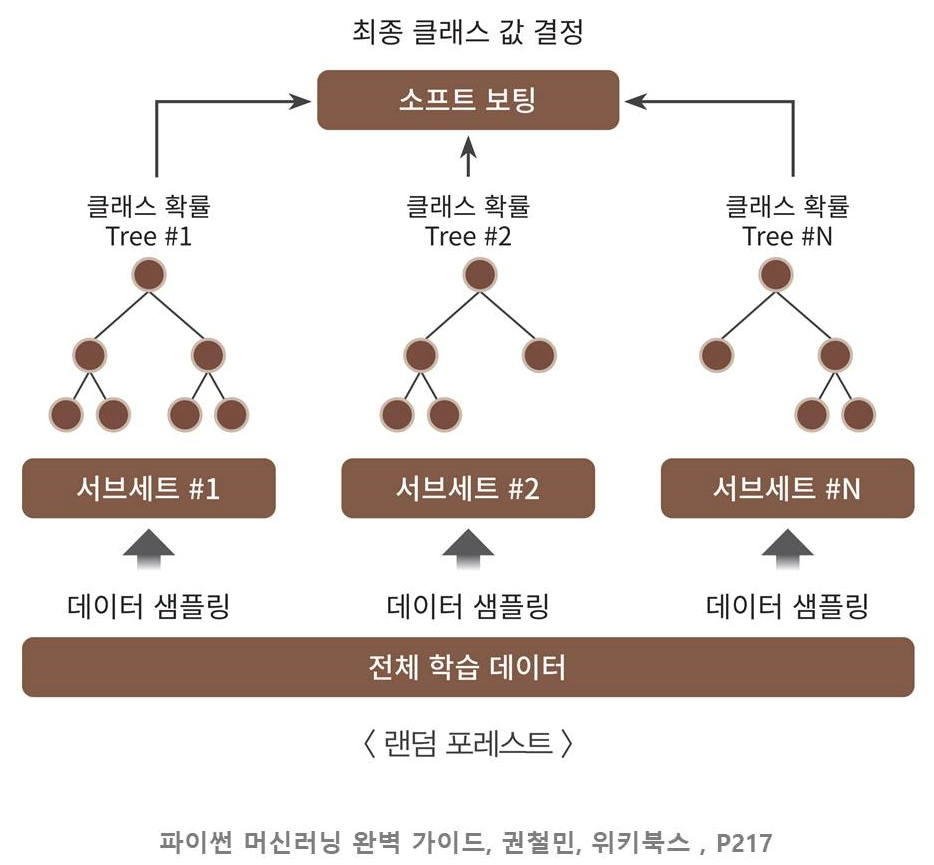

랜덤 포레스트에서의 부트 스트래핑 샘플링 방식  

부트 스트래핑 분할 방식  
- 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식  
- 각 샘플링된 데이터 내에는 중복 데이터 포함  

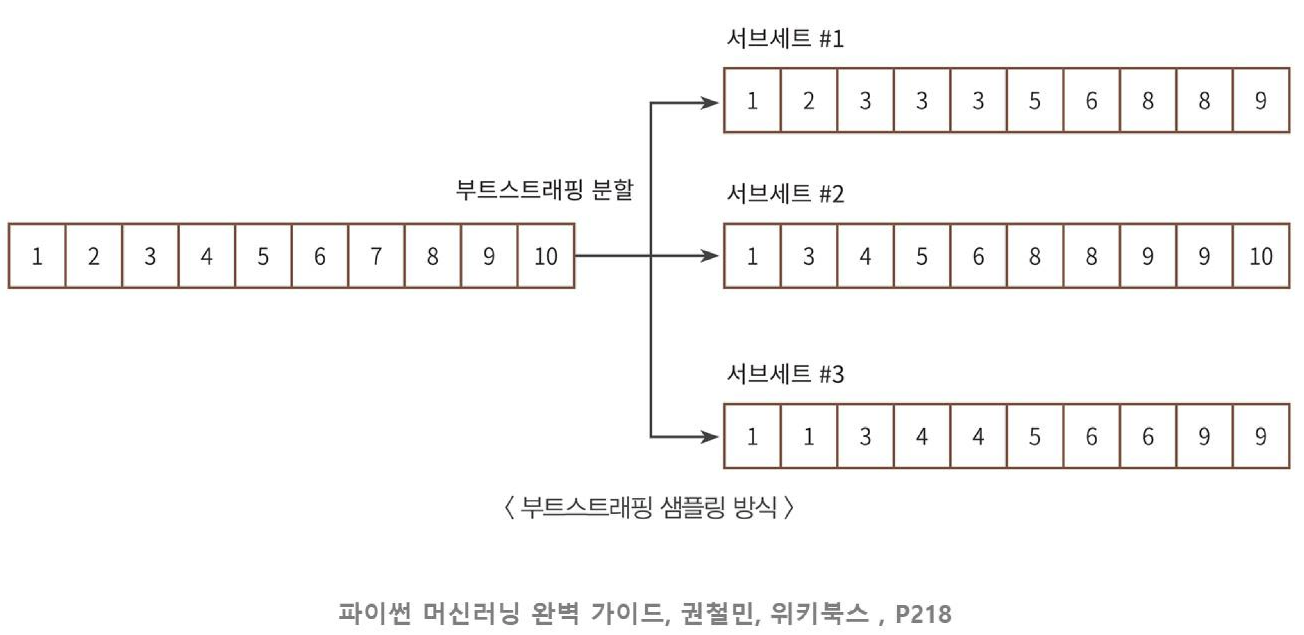

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd

### 랜덤 포레스트 예제
- 사용자 행동 인식 데이터 세트  
- 사이킷런의 RandomForestClassifier 클래스를 이용해 예측 수행  

#### 사용자 행동 인식 (Human Activity Recognition) 데이터 세트
- 스마트폰의 가속도 센서와 자이로스코프 센서를 사용하여 수집한 사용자 행동 데이터  
- 19세에서 48세 사이의 30명의 지원자를 대상으로   
- 삼성 갤럭시S2 스마트폰을 착용하고 걷기, 계단 오르기, 계단 내려오기, 앉기, 서기, 눕기의   
- 여섯 가지 동작을 정해진 순서와 시간에 맞춰 수행하면서   
- 3축 가속도와 자이로스코프 센서 신호를 50Hz로 샘플링하여   
- 약 2.56초의 샘플 윈도우 단위를 50%씩 겹치게 하여   
- 10,299개의 데이터를 수집  

---
- activity_labels  (여섯 가지 동작)  
1 WALKING  
2 WALKING_UPSTAIRS  
3 WALKING_DOWNSTAIRS  
4 SITTING  
5 STANDING  
6 LAYING  


---
참고
- 시간 영역 특징은 t로 시작
- Acc-XYZ은 가속도 센서
- Gyro-XYZ로 표시된 것은 자이로스코프 센서로 부터 수집된 것
- 시간 영역 특징인 각 윈도우에서 신호를 평균화하여 얻은 angle 특징 벡터 

In [3]:
X_train = pd.read_csv('../data/human_X_train.csv')
X_test = pd.read_csv('../data/human_X_test.csv')
y_train = pd.read_csv('../data/y_train.txt', sep='\s+', header=None, names=['action'])
y_test = pd.read_csv('../data/y_test.txt', sep='\s+', header=None, names=['action'])
X_train.head()
X_test.head()
y_train.head()
y_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


,action
0,5
1,5
2,5
3,5
4,5


,action
0,5
1,5
2,5
3,5
4,5


#### 먼저 결정트리 알고리즘 사용해서 성능 확인

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11) # n_estimators=100이 기본값
dt_clf.fit(X_train, y_train['action'])
y_pred = dt_clf.predict(X_test)

print(f'Decision Tree Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%')

DecisionTreeClassifier(random_state=11)

Decision Tree Accuracy : 86.12%


#### 랜덤 포레스트 알고리즘 사용해서 성능 확인

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=11, n_jobs=4) # CPU 4코어 쓰기
rf_clf.fit(X_train, y_train['action'])
y_pred = rf_clf.predict(X_test)

print(f'Random Forest Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%')

RandomForestClassifier(n_jobs=4, random_state=11)

Random Forest Accuracy : 92.53%


In [6]:
rf_clf = RandomForestClassifier(random_state=11, n_estimators=300, n_jobs=4)
rf_clf.fit(X_train, y_train['action'])
y_pred = rf_clf.predict(X_test)

print(f'Random Forest Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%')

RandomForestClassifier(n_estimators=300, n_jobs=4, random_state=11)

Random Forest Accuracy : 92.37%


In [7]:
rf_clf = RandomForestClassifier(random_state=11, n_estimators=60, n_jobs=4)
rf_clf.fit(X_train, y_train['action'])
y_pred = rf_clf.predict(X_test)

print(f'Random Forest Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%')

RandomForestClassifier(n_estimators=60, n_jobs=4, random_state=11)

Random Forest Accuracy : 92.81%


GridSearchCV로 교차검증 및 하이퍼 파라미터 튜닝  
- 튜닝 시간을 절약하기 위해  
- n_estimators = 100  
- cv = 2  

n_estimators : 결정 트리의 개수 .디폴트 100  
- 많이 설정할수록 성능을 기대할 수 있지만  
- 계속 증가시킨다고 무조건 향상되는 것은 아님  
- 증가시킬수록 학습 수행 시간이 오래 걸린다는 문제가 있음  

예제 수행 시간 오래 걸림   
- 멀티 코어 환경에서는 빠르게 학습이 가능  
- 그래서 그레디언트 부스팅보다 예측 성능이 약간 떨어지더라도  
- 랜덤 포레스트로 일단 기반 모델을 먼저 구축하는 경우가 많음  
- 멀티 코어 환경에서는 n_jobs=-1로 추가하면 모든 CPU 코어 이용해서 학습이 가능  



In [8]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 3, 5]    
}

rf_clf = RandomForestClassifier(random_state=11, n_jobs=6)
grid_rf_clf = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_rf_clf.fit(X_train, y_train['action'])

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_rf_clf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f} '.format(grid_rf_clf.best_score_))

# 최고 점수를 낸 파라미터를 가진 모형(모델)
best_rf_clf = grid_rf_clf.best_estimator_


# 최적 하이퍼  파라미터로 학습된 Estimator 예측/평가 수행
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : {0:.4f} '.format(accuracy))

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=6, random_state=11),
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
GridSearchCV 최고 정확도 : {0:.4f}  0.916489962402364
하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : {0:.4f}  0.9039701391245334


### 개별 feature들의 중요도 시각화

- feature_importances_ 속성을 이용해서 피처중요를 알 수 있음

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [11]:
rf_clf = RandomForestClassifier(random_state=11, n_jobs=4)
rf_clf.fit(X_train, y_train['action'])

RandomForestClassifier(n_jobs=4, random_state=11)

<Axes: >

Text(0.5, 1.0, '피처 중요도')

Text(0, 0.5, 'Mean decrease in impurity')

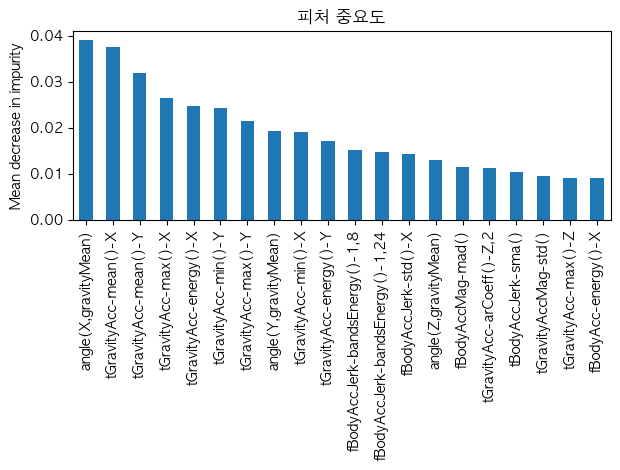

In [12]:
f_imp = pd.Series(rf_clf.feature_importances_,
                 index=X_train.columns).sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
f_imp.plot.bar(ax=ax)
ax.set_title("피처 중요도")
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

<Axes: >

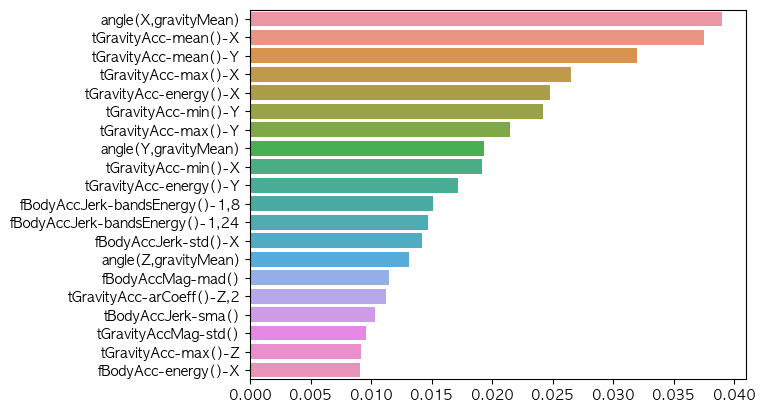

In [13]:
# 수평 막대 그래프로 출력 

f_imp = pd.Series(rf_clf.feature_importances_,
                 index=X_train.columns).sort_values(ascending=False)[:20]
sns.barplot(x=f_imp,y=f_imp.index)
plt.show()

## BaggingClassifier 사용하기

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bg_clf = BaggingClassifier(random_state=11, estimator=DecisionTreeClassifier(max_depth=6),
                                                                             n_estimators=50)
y_pred = bg_clf.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
bg_clf = BaggingClassifier(random_state=11, estimator=KNeighborsClassifier())

y_pred = bg_clf.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.8920936545639634

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bg_clf = BaggingClassifier(random_state=11, estimator=SVC())

y_pred = bg_clf.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)